## **Connect to  Big Query Dataset**

In [ ]:
!pip install google-cloud-bigquery

from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery

project_id = 'mgmt599-pavanmeka-lab1'
client = bigquery.Client(project=project_id)

dataset_id = 'lab1_eda'
dataset_ref = client.dataset(dataset_id)

try:
    dataset = client.get_dataset(dataset_ref)
    print(f"Successfully connected to dataset: {dataset.full_dataset_id}")
except Exception as e:
    print(f"Error connecting to dataset: {e}")

Successfully connected to dataset: mgmt599-pavanmeka-lab1:lab1_eda


In [ ]:

table_id = 'superstore-dataset' # Replace with your BigQuery table ID
table_ref = dataset_ref.table(table_id)


try:
    table = client.get_table(table_ref)
    print(f"Successfully connected to table: {table.full_table_id}")
except Exception as e:
    print(f"Error connecting to table: {e}")

Successfully connected to table: mgmt599-pavanmeka-lab1:lab1_eda.superstore-dataset


In [ ]:

query = f"""
SELECT
  *
FROM
  `{project_id}.{dataset_id}.{table_id}`

"""

df = client.query(query).to_dataframe()
df

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2021-154900,2020-02-25,2020-03-01,Sung Shariari,Avery,Avery 518,Consumer,Office Supplies,Labels,East,1453,Leominster,Massachusetts,United States,0.0,1.5120,1,3.150,0.4800
1,US-2021-154900,2020-02-25,2020-03-01,Sung Shariari,Adams,Adams Telephone Message Book W/Dividers/Space ...,Consumer,Office Supplies,Paper,East,1453,Leominster,Massachusetts,United States,0.0,10.2240,4,22.720,0.4500
2,US-2022-152415,2021-09-17,2021-09-22,Patrick O'Donnell,C-Line,"C-Line Magnetic Cubicle Keepers, Clear Polypro...",Consumer,Furniture,Furnishings,East,1752,Marlborough,Massachusetts,United States,0.0,6.2244,3,14.820,0.4200
3,US-2022-152415,2021-09-17,2021-09-22,Patrick O'Donnell,Howard Miller,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",Consumer,Furniture,Furnishings,East,1752,Marlborough,Massachusetts,United States,0.0,61.3824,3,191.820,0.3200
4,US-2022-153269,2021-03-09,2021-03-12,Pamela Stobb,Other,"Situations Contoured Folding Chairs, 4/Set",Consumer,Furniture,Chairs,East,1810,Andover,Massachusetts,United States,0.0,88.7250,5,354.900,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,US-2023-119564,2022-12-15,2022-12-20,Paul Lucas,Other,"Master Giant Foot Doorstop, Safety Yellow",Home Office,Furniture,Furnishings,West,98115,Seattle,Washington,United States,0.0,9.7911,3,22.770,0.4300
9990,US-2020-131982,2019-03-07,2019-03-11,Nora Pelletier,Other,Catalog Binders with Expanding Posts,Home Office,Office Supplies,Binders,West,98198,Des Moines,Washington,United States,0.2,33.6400,2,107.648,0.3125
9991,US-2021-150511,2020-09-18,2020-09-24,Adam Bellavance,Wirebound,"Wirebound Message Books, Four 2 3/4"" x 5"" Form...",Home Office,Office Supplies,Paper,West,98198,Des Moines,Washington,United States,0.0,8.7138,2,18.540,0.4700
9992,US-2022-155488,2021-11-13,2021-11-17,Frank Merwin,Boston,Boston 16801 Nautilus Battery Pencil Sharpener,Home Office,Office Supplies,Art,West,98661,Vancouver,Washington,United States,0.0,11.4452,2,44.020,0.2600


## Overview Of Data

In [ ]:

print("\n--- Info ---")
print(df.info())

print("\n--- Head ---")
print(df.head())

print("\n--- Describe ---")
print(df.describe(include='all'))

print("\n--- Null Values ---")
print(df.isnull().sum())

print("\n--- Unique Values ---")
print(df.nunique())


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   dbdate 
 2   ship_date      9994 non-null   dbdate 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   Int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9994 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9994 non-null   Int64  
 17  sales          9994 non-null   float64

## Clean the Data

In [ ]:
# Parse 'Order Date' into Year, Quarter, and Month
df['order_date'] = pd.to_datetime(df['order_date'])
df['Order Year'] = df['order_date'].dt.year
df['Order Quarter'] = df['order_date'].dt.quarter
df['Order Month'] = df['order_date'].dt.month

# Check for missing/null records and rectify.
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(0, inplace=True) # Filling numerical NaNs with 0
        else:
            df[col].fillna('Unknown', inplace=True) # Filling categorical NaNs with 'Unknown'

print("\n--- Null Values After Filling ---")
print(df.isnull().sum())

# Add computed fields
# Ensure 'Profit' and 'Sales' are numeric. Coerce errors will turn non-numeric to NaN.
df['profit'] = pd.to_numeric(df['profit'], errors='coerce').fillna(0)
df['sales'] = pd.to_numeric(df['sales'], errors='coerce').fillna(0)
df['discount'] = pd.to_numeric(df['discount'], errors='coerce').fillna(0)

# Avoid division by zero for Profit Margin
df['Profit Margin'] = df.apply(lambda row: row['profit'] / row['sales'] if row['sales'] != 0 else 0, axis=1)

df['Net Profit (after discount)'] = df['profit']

print("\n--- DataFrame after Cleaning and Feature Engineering ---")
print(df.head())

print("\n--- Info after Cleaning and Feature Engineering ---")
print(df.info())

print("\n--- Describe after Cleaning and Feature Engineering ---")
print(df.describe(include='all'))


--- Null Values After Filling ---
order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
Order Year       0
Order Quarter    0
Order Month      0
dtype: int64

--- DataFrame after Cleaning and Feature Engineering ---
         order_id order_date   ship_date           customer    manufactory  \
0  US-2021-154900 2020-02-25  2020-03-01      Sung Shariari          Avery   
1  US-2021-154900 2020-02-25  2020-03-01      Sung Shariari          Adams   
2  US-2022-152415 2021-09-17  2021-09-22  Patrick O'Donnell         C-Line   
3  US-2022-152415 2021-09-17  2021-09-22  Patrick O'Donnell  Howard Miller   
4  US-2022-153269 2021-03-09  2021-03-12       Pamela Stobb          Other   

       

## D- Discover

In [ ]:
import pandas as pd

# Aggregate KPIs by category, subcategory, and product_name
kpi_aggregation = df.groupby(['category', 'subcategory', 'product_name']).agg(
    Total_Sales=('sales', 'sum'),
    Total_Profit=('profit', 'sum'),
    Average_Profit_Margin=('Profit Margin', 'mean'),
    Order_Count=('order_id', 'count')
).reset_index()

print("\n--- Aggregated KPIs by Category, Subcategory, and Product Name ---")
print(kpi_aggregation.head())

# Rank top 10 products by Total Sales
top_10_products_by_sales = kpi_aggregation.nlargest(10, 'Total_Sales')
print("\n--- Top 10 Products by Total Sales ---")
print(top_10_products_by_sales)

# Rank top 10 products by Total Profit
top_10_products_by_profit = kpi_aggregation.nlargest(10, 'Total_Profit')
print("\n--- Top 10 Products by Total Profit ---")
print(top_10_products_by_profit)

# Rank top 10 products by Profit Margin
top_10_products_by_profit_margin = kpi_aggregation.nlargest(10, 'Average_Profit_Margin')
print("\n--- Top 10 Products by Profit Margin ---")
print(top_10_products_by_profit_margin)

# Aggregate KPIs by category
category_aggregation = df.groupby(['category']).agg(
    Total_Sales=('sales', 'sum'),
    Total_Profit=('profit', 'sum'),
    Average_Profit_Margin=('Profit Margin', 'mean'),
    Order_Count=('order_id', 'count')
).reset_index()

print("\n--- Aggregated KPIs by Category ---")
print(category_aggregation.head())

# Rank top 10 categories by Total Sales
top_10_categories_by_sales = category_aggregation.nlargest(10, 'Total_Sales')
print("\n--- Top 10 Categories by Total Sales ---")
print(top_10_categories_by_sales)

# Rank top 10 categories by Total Profit
top_10_categories_by_profit = category_aggregation.nlargest(10, 'Total_Profit')
print("\n--- Top 10 Categories by Total Profit ---")
print(top_10_categories_by_profit)

# Rank top 10 categories by Profit Margin
top_10_categories_by_profit_margin = category_aggregation.nlargest(10, 'Average_Profit_Margin')
print("\n--- Top 10 Categories by Profit Margin ---")
print(top_10_categories_by_profit_margin)


# Group by time (Year and Quarter) and analyze trends for top categories
# Identify top categories based on total sales for the entire period to analyze their trends
top_categories = top_10_categories_by_sales['category'].tolist()

# Filter the original dataframe for only the top categories
df_top_categories = df[df['category'].isin(top_categories)]

# Aggregate sales by Year and Quarter for top categories
sales_trends_time = df_top_categories.groupby(['Order Year', 'Order Quarter', 'category']).agg(
    Total_Sales=('sales', 'sum')
).reset_index()

print("\n--- Sales Trends over Time for Top Categories (Year and Quarter) ---")
print(sales_trends_time.head())

# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(15, 8))
# sns.lineplot(data=sales_trends_time, x='Order Year', y='Total_Sales', hue='category', marker='o')
# plt.title('Sales Trends Over Time for Top Categories')
# plt.xlabel('Year')
# plt.ylabel('Total Sales')
# plt.xticks(sales_trends_time['Order Year'].unique())
# plt.grid(True)
# plt.show()

#  sales trend for the top product by sales
top_product_name = top_10_products_by_sales.iloc[0]['product_name']
df_top_product = df[df['product_name'] == top_product_name]

product_sales_trends_time = df_top_product.groupby(['Order Year', 'Order Quarter']).agg(
    Total_Sales=('sales', 'sum')
).reset_index()

print(f"\n--- Sales Trends over Time for Top Product: {top_product_name} ---")
product_sales_trends_time

# plt.figure(figsize=(10, 5))
# sns.lineplot(data=product_sales_trends_time, x='Order Year', y='Total_Sales', marker='o')
# plt.title(f'Sales Trend Over Time for {top_product_name}')
# plt.xlabel('Year')
# plt.ylabel('Total Sales')
# plt.xticks(product_sales_trends_time['Order Year'].unique())
# plt.grid(True)
# plt.show()


--- Aggregated KPIs by Category, Subcategory, and Product Name ---
    category subcategory                                       product_name  \
0  Furniture   Bookcases  Atlantic Metals Mobile 2-Shelf Bookcases, Cust...   
1  Furniture   Bookcases  Atlantic Metals Mobile 3-Shelf Bookcases, Cust...   
2  Furniture   Bookcases  Atlantic Metals Mobile 4-Shelf Bookcases, Cust...   
3  Furniture   Bookcases  Atlantic Metals Mobile 5-Shelf Bookcases, Cust...   
4  Furniture   Bookcases                            Bestar Classic Bookcase   

   Total_Sales  Total_Profit  Average_Profit_Margin  Order_Count  
0     400.0268     -113.2606              -0.705392            2  
1    7539.7122      780.3302               0.044879            8  
2    5184.0810     -126.4410              -0.100899            6  
3    5492.8850       15.0490              -0.128064            8  
4    1897.8102     -612.9387              -0.467132            8  

--- Top 10 Products by Total Sales ---
             ca

,Order Year,Order Quarter,Total_Sales
0,2021,2,8399.976
1,2021,4,17499.950
2,2022,1,13999.960
3,2022,4,21699.938


## D – Discover: Summary

### Top Performing Product
- **Canon imageCLASS 2200 Advanced Copier** is the top performer:
  - **Sales**: \$61,599
  - **Profit**: \$25,200
  - **Profit Margin**: ~38%
- Sales peaked in **Q4 2022**, indicating strong and sustained demand.

### High Profit Margin Products
- **Office Supplies** like *Avery* and *Adams* products consistently reached **50% profit margins**.
- However, these had **low sales volumes**, suggesting they’re profitable but niche.

### Top Categories
- **Technology** leads across all key metrics:
  - **Total Sales**: \$836K
  - **Total Profit**: \$145K
  - **Avg. Profit Margin**: **15.6%**
- **Office Supplies** follows, with strong but slightly lower performance.
- **Furniture** shows **high sales** (\$742K) but **very low margins** (~3.9%), making it less efficient.

### Sales Trend by Quarter
- Sales are **cyclical**, with visible growth over time.
- **Q4 shows consistent peaks**, especially for high-value products like Canon copiers.
- This implies a **year-end procurement or budgeting pattern** likely driven by corporate customers.

## I - Investigate

In [ ]:
# Segment by discount ranges
def discount_segment(discount):
    if discount == 0:
        return '0%'
    elif 0 < discount <= 0.2:
        return '0.01-0.2'
    else:
        return '>0.2'

df['Discount_Segment'] = df['discount'].apply(discount_segment)

# Compare mean sales, profit, profit_margin, and quantity by discount segment
discount_segment_analysis = df.groupby('Discount_Segment').agg(
    Mean_Sales=('sales', 'mean'),
    Mean_Profit=('profit', 'mean'),
    Mean_Profit_Margin=('Profit Margin', 'mean'),
    Mean_Quantity=('quantity', 'mean')
).reset_index()

print("\n--- Analysis by Discount Segment ---")
print(discount_segment_analysis)


# Compare profit metrics across customer segment
customer_segment_analysis = df.groupby('segment').agg(
    Mean_Sales=('sales', 'mean'),
    Mean_Profit=('profit', 'mean'),
    Mean_Profit_Margin=('Profit Margin', 'mean')
).reset_index()

print("\n--- Analysis by Customer Segment ---")
print(customer_segment_analysis)

# Compare profit metrics across region
region_analysis = df.groupby('region').agg(
    Mean_Sales=('sales', 'mean'),
    Mean_Profit=('profit', 'mean'),
    Mean_Profit_Margin=('Profit Margin', 'mean')
).reset_index()

print("\n--- Analysis by Region ---")
print(region_analysis)


# Compare profit metrics across state (top 10 states by total sales for brevity)
top_states = df.groupby('state')['sales'].sum().nlargest(10).index.tolist()
state_analysis = df[df['state'].isin(top_states)].groupby('state').agg(
    Mean_Sales=('sales', 'mean'),
    Mean_Profit=('profit', 'mean'),
    Mean_Profit_Margin=('Profit Margin', 'mean')
).reset_index()

print("\n--- Analysis by State (Top 10 States by Sales) ---")
print(state_analysis)


# Compare profit metrics across subcategory
subcategory_analysis = df.groupby('subcategory').agg(
    Mean_Sales=('sales', 'mean'),
    Mean_Profit=('profit', 'mean'),
    Mean_Profit_Margin=('Profit Margin', 'mean')
).reset_index()

print("\n--- Analysis by Subcategory ---")
print(subcategory_analysis)

# Use time segmentation (e.g., Order Quarter) to spot volatility or seasonal discount strategies
discount_seasonality = df.groupby(['Order Year', 'Order Quarter', 'Discount_Segment']).agg(
    Mean_Sales=('sales', 'mean'),
    Mean_Profit=('profit', 'mean'),
    Mean_Discount=('discount', 'mean'),
    Transaction_Count=('order_id', 'count') # Number of transactions in this segment
).reset_index()

print("\n--- Discount Strategies and Performance by Quarter ---")
print(discount_seasonality.head())



--- Analysis by Discount Segment ---
  Discount_Segment  Mean_Sales  Mean_Profit  Mean_Profit_Margin  Mean_Quantity
0               0%  226.742074    66.900292            0.340160       3.807211
1         0.01-0.2  222.593279    26.501571            0.174368       3.742046
2             >0.2  260.423654   -97.183098           -0.784489       3.858579

--- Analysis by Customer Segment ---
       segment  Mean_Sales  Mean_Profit  Mean_Profit_Margin
0     Consumer  223.733644    25.836873            0.112050
1    Corporate  233.823300    30.456667            0.121203
2  Home Office  240.972041    33.818664            0.142870

--- Analysis by Region ---
    region  Mean_Sales  Mean_Profit  Mean_Profit_Margin
0  Central  215.772661    17.092709           -0.104073
1     East  238.336110    32.135808            0.167227
2    South  241.803645    28.857673            0.163519
3     West  226.493233    33.849032            0.219487

--- Analysis by State (Top 10 States by Sales) ---
        

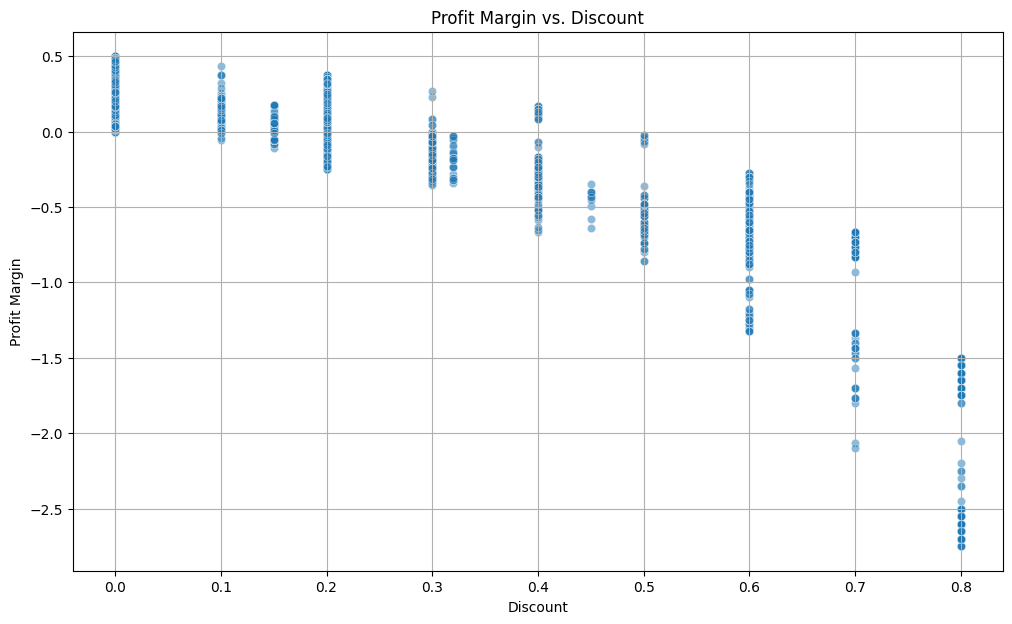

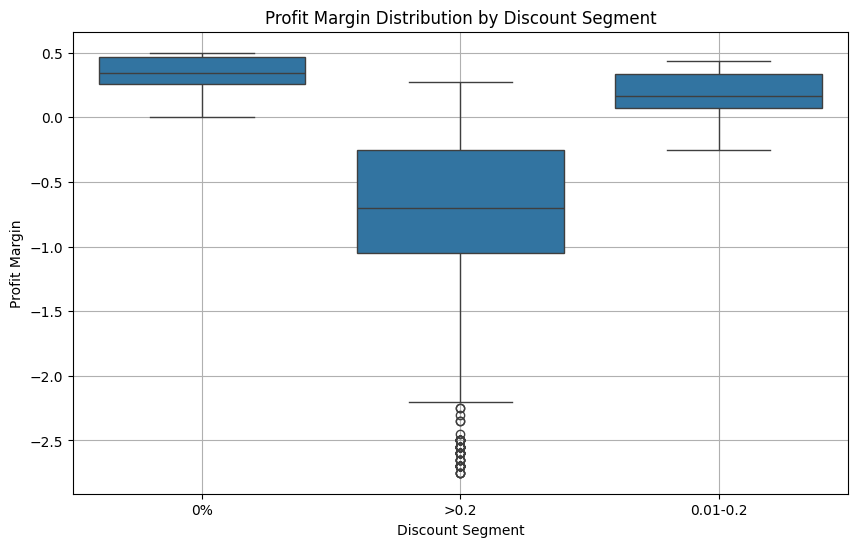


--- Average Sales and Profit per Transaction by Discount Segment ---
  Discount_Segment  Mean_Sales_Per_Transaction  Mean_Profit_Per_Transaction  \
0               0%                  226.742074                    66.900292   
1         0.01-0.2                  222.593279                    26.501571   
2             >0.2                  260.423654                   -97.183098   

   Total_Transactions  
0                4798  
1                3803  
2                1393  

--- Discount Segment Frequency Over Time ---
Discount_Segment             0%  0.01-0.2   >0.2
Order Year Order Quarter                        
2019       1              140.0     101.0   41.0
           2              195.0     142.0   55.0
           3              269.0     220.0   75.0
           4              333.0     311.0  111.0
2020       1              134.0      85.0   41.0


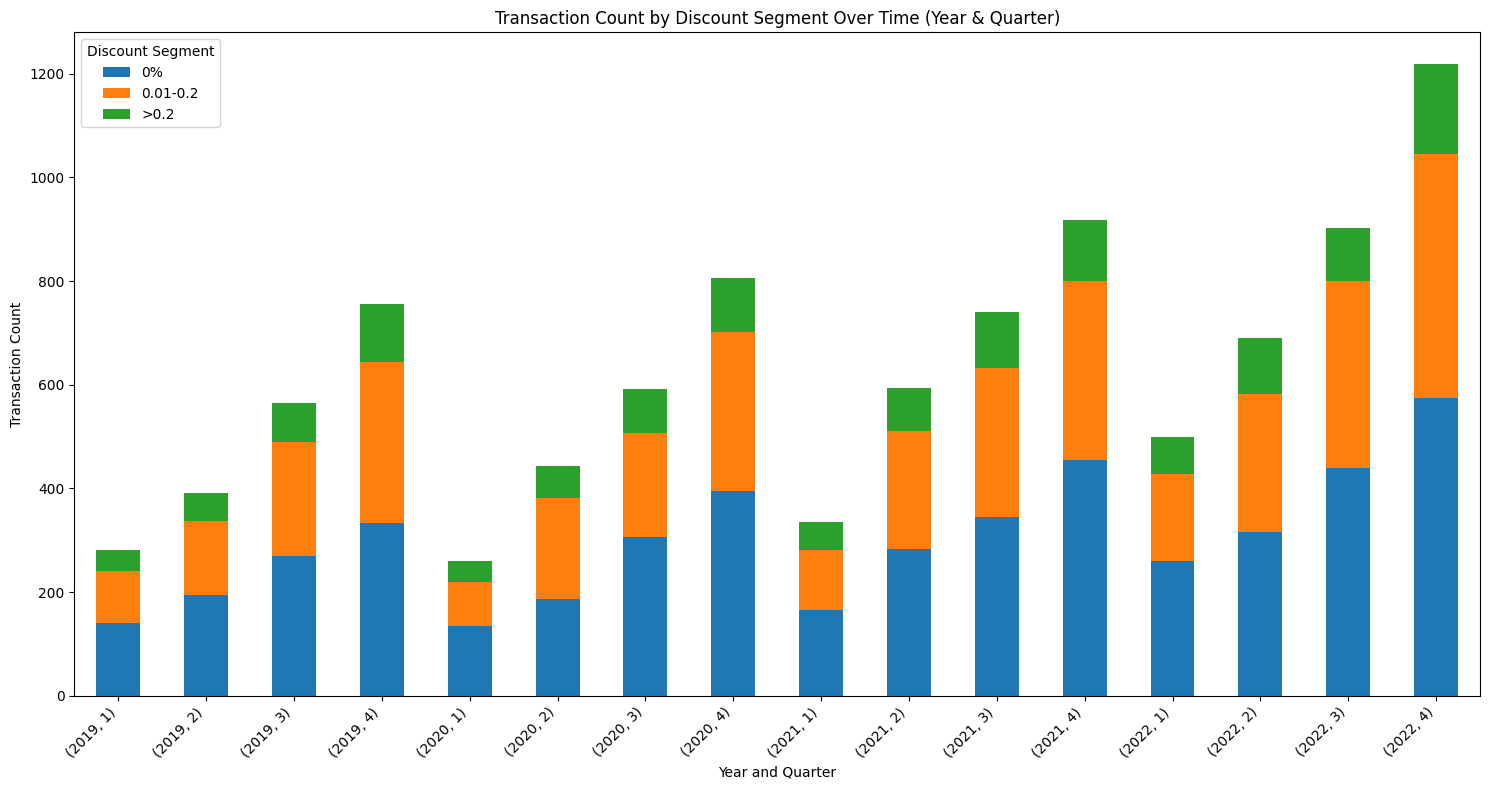


--- Total Transactions by Discount Segment ---
  Discount_Segment  Total_Transactions
0               0%                4798
1         0.01-0.2                3803
2             >0.2                1393


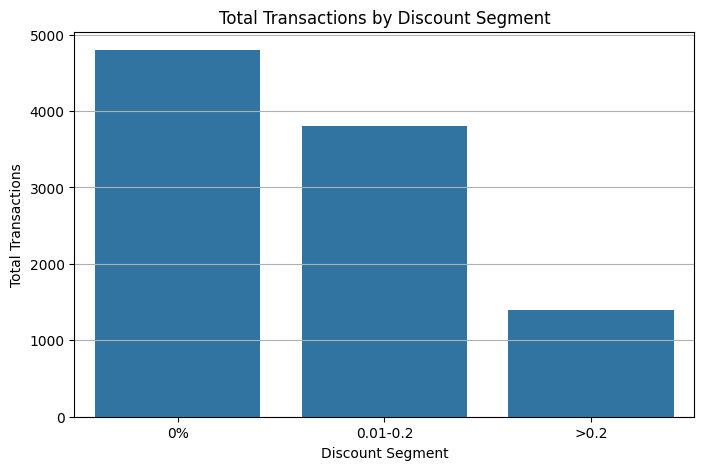


--- Average Discount by Category ---
          category  discount
0        Furniture  0.173923
1  Office Supplies  0.157285
2       Technology  0.132323

--- Average Discount by Subcategory (Sorted) ---
   subcategory  discount
3      Binders  0.372292
11    Machines  0.306087
16      Tables  0.261285
4    Bookcases  0.211140
5       Chairs  0.170178


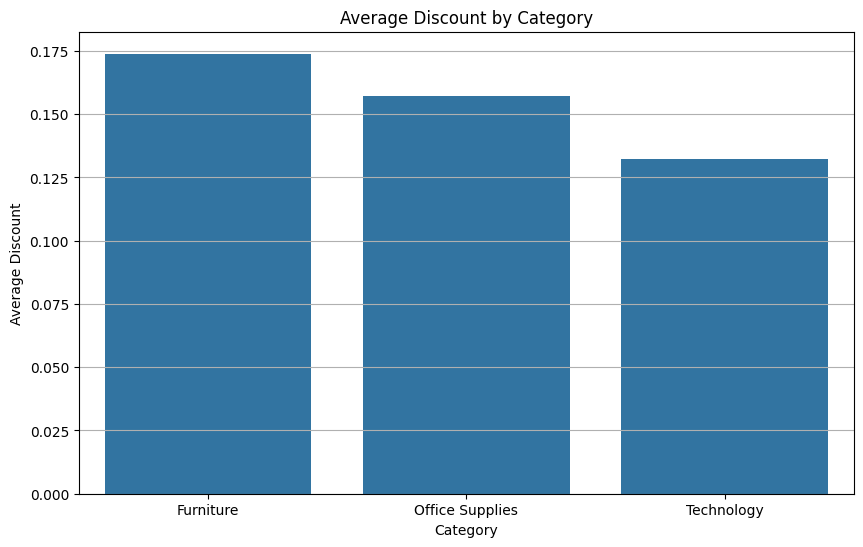

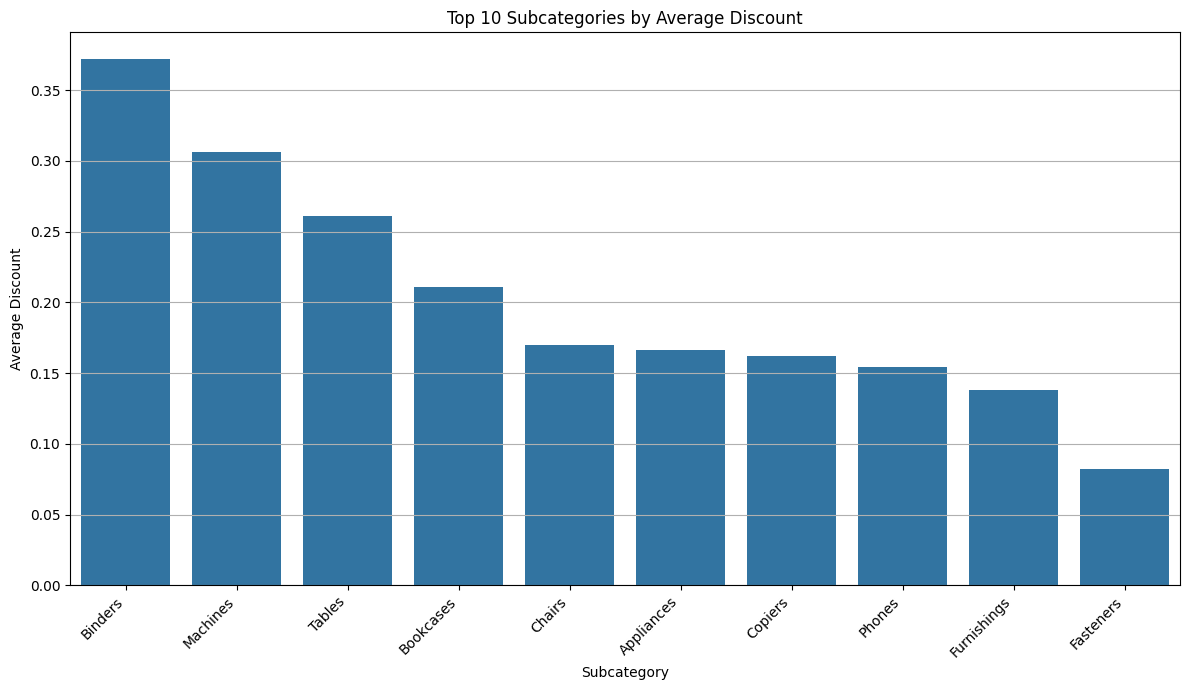

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Further investigate the relationship between Discount and Profitability

# Scatter plot of Discount vs Profit Margin for individual orders
# This can show if higher discounts generally lead to lower profit margins
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='discount', y='Profit Margin', alpha=0.5)
plt.title('Profit Margin vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.show()

# Box plot of Profit Margin by Discount Segment
# This visualizes the distribution of profit margins within each discount segment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Discount_Segment', y='Profit Margin')
plt.title('Profit Margin Distribution by Discount Segment')
plt.xlabel('Discount Segment')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.show()

# Analyze the average sales and profit per transaction by discount segment to understand if discounts drive transaction value
discount_transaction_value = df.groupby('Discount_Segment').agg(
    Mean_Sales_Per_Transaction=('sales', 'mean'), # Same as Mean_Sales in discount_segment_analysis, but re-emphasizing transaction
    Mean_Profit_Per_Transaction=('profit', 'mean'), # Same as Mean_Profit in discount_segment_analysis
    Total_Transactions=('order_id', 'count')
).reset_index()

print("\n--- Average Sales and Profit per Transaction by Discount Segment ---")
print(discount_transaction_value)

# Analyze the frequency of different discount segments over time (e.g., by Quarter)
discount_frequency_seasonality = df.groupby(['Order Year', 'Order Quarter', 'Discount_Segment']).agg(
    Transaction_Count=('order_id', 'count')
).reset_index()

# Pivot the data for easier visualization of discount frequency trends
pivoted_discount_frequency = discount_frequency_seasonality.pivot_table(
    index=['Order Year', 'Order Quarter'],
    columns='Discount_Segment',
    values='Transaction_Count'
).fillna(0) # Fill missing combinations with 0 transactions

print("\n--- Discount Segment Frequency Over Time ---")
print(pivoted_discount_frequency.head())

# Stacked bar chart of transaction count by discount segment over time
pivoted_discount_frequency.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Transaction Count by Discount Segment Over Time (Year & Quarter)')
plt.xlabel('Year and Quarter')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Discount Segment')
plt.tight_layout()
plt.show()

# Compare the total number of transactions in each discount segment
total_transactions_by_discount = df['Discount_Segment'].value_counts().reset_index()
total_transactions_by_discount.columns = ['Discount_Segment', 'Total_Transactions']
print("\n--- Total Transactions by Discount Segment ---")
print(total_transactions_by_discount)

# Plotting total transactions by discount segment
plt.figure(figsize=(8, 5))
sns.barplot(data=total_transactions_by_discount, x='Discount_Segment', y='Total_Transactions')
plt.title('Total Transactions by Discount Segment')
plt.xlabel('Discount Segment')
plt.ylabel('Total Transactions')
plt.grid(axis='y')
plt.show()

# Investigate if certain categories or subcategories are more frequently discounted
discount_by_category = df.groupby('category')['discount'].mean().reset_index()
discount_by_subcategory = df.groupby('subcategory')['discount'].mean().reset_index().sort_values(by='discount', ascending=False)

print("\n--- Average Discount by Category ---")
print(discount_by_category)

print("\n--- Average Discount by Subcategory (Sorted) ---")
print(discount_by_subcategory.head()) # Show top subcategories by average discount

# Visualize average discount by category
plt.figure(figsize=(10, 6))
sns.barplot(data=discount_by_category, x='category', y='discount')
plt.title('Average Discount by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount')
plt.grid(axis='y')
plt.show()

# Visualize average discount by subcategory (Top 10 for clarity)
plt.figure(figsize=(12, 7))
sns.barplot(data=discount_by_subcategory.head(10), x='subcategory', y='discount')
plt.title('Top 10 Subcategories by Average Discount')
plt.xlabel('Subcategory')
plt.ylabel('Average Discount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Investigate: Summary

### Impact of Discounts on Profitability
- **0% Discount** orders yield the **highest average profit margin (34%)** and profit per transaction.
- Discounts in the range of **>20% lead to negative profit margins (-78%)**, showing that **deep discounting is highly unprofitable**.
- While average **sales per transaction are highest** in the >20% discount group, it comes at the cost of **negative profits**.

### Customer Segment Profitability
- **Home Office** customers offer the **highest average profit margin (14.3%)**, followed by:
  - **Corporate** - 12.1%
  - **Consumer** - 11.2%
- Although Consumer segment contributes the most transactions, **profitability is stronger in B2B segments** (Home Office & Corporate).

### Regional Performance
- The **West region** is the most profitable with a **21.9% average profit margin**.
- The **Central region has negative average profit margins**, indicating possible issues with cost structure or aggressive discounting.

### State-Level Observations
- **Top-performing states** (by margin and profit):
  - *California, Virginia, Michigan, New York*
- **Unprofitable states**:
  - *Illinois, Texas, Ohio, Pennsylvania* - all show **negative average profit**

### Subcategory Performance
- **Most Profitable Subcategories**:
  - *Labels (43%), Paper (42.5%), Envelopes (42.3%), Copiers (31.7%)*
- **Loss-Making Subcategories**:
  - *Tables, Machines, Binders, Bookcases* - all showing **negative average profit or margin**

### Seasonality & Discount Patterns
- **Discounting spikes in Q4** across years - especially in the >20% range.
- These **higher discounts coincide with lower profits**, suggesting over-discounting during high-volume sales periods (year-end).

### Discount Strategy Insights
- **Binders (37%), Machines (30%), and Tables (26%)** receive the **highest average discounts**, often tied to low margins.
- **Technology category has the lowest average discount (13%)**, yet delivers **high profit margins**, showing **pricing discipline leads to better returns**.



## V- Validate


--- Correlation Matrix of Numerical Columns ---
               discount  quantity     sales    profit  Profit Margin
discount       1.000000  0.008623 -0.028190 -0.219487      -0.864452
quantity       0.008623  1.000000  0.200795  0.066253      -0.005280
sales         -0.028190  0.200795  1.000000  0.479064       0.003444
profit        -0.219487  0.066253  0.479064  1.000000       0.223732
Profit Margin -0.864452 -0.005280  0.003444  0.223732       1.000000


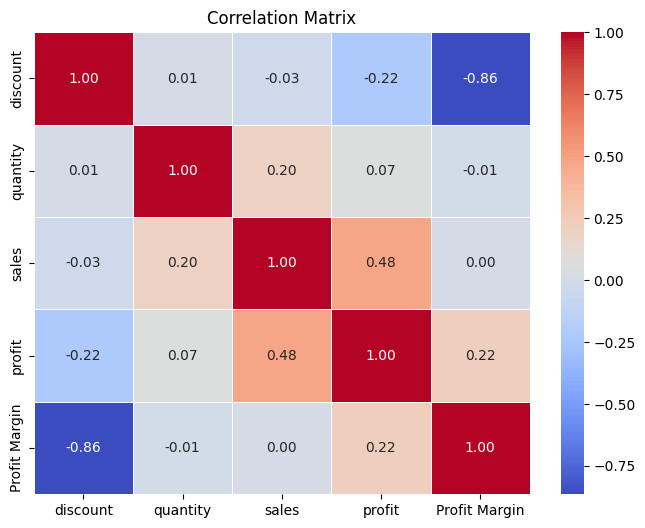


--- Regression Analysis (OLS) predicting Profit Margin ---
                            OLS Regression Results                            
Dep. Variable:          Profit Margin   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     3101.
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:43:18   Log-Likelihood:                 492.62
No. Observations:                9994   AIC:                            -963.2
Df Residuals:                    9983   BIC:                            -883.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
from scipy import stats
import statsmodels.api as sm

# Correlation matrix of numerical columns
numerical_cols = ['discount', 'quantity', 'sales', 'profit', 'Profit Margin']
correlation_matrix = df[numerical_cols].corr()

print("\n--- Correlation Matrix of Numerical Columns ---")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()




# Prepare data for regression
# Define dependent variable (y) and independent variables (X)
y = df['Profit Margin']

# Select potential independent variables
# Include numerical and categorical variables
X_numerical = df[['discount', 'quantity', 'sales']]
# Convert categorical variables into dummy/indicator variables
X_categorical = pd.get_dummies(df[['category', 'segment', 'region']], drop_first=True)

# Combine numerical and categorical features
X = pd.concat([X_numerical, X_categorical], axis=1)

# Handle potential issues with constant columns or perfect multicollinearity after one-hot encoding
# Drop columns with zero variance (if any)
X = X.loc[:, X.var() != 0]

# Add a constant to the independent variables matrix for the intercept
X = sm.add_constant(X, has_constant='add')

# Fit the  regression model
try:
    # Explicitly cast X to float to avoid ValueError
    model = sm.OLS(y, X.astype(float)).fit()
    print("\n--- Regression Analysis (OLS) predicting Profit Margin ---")
    print(model.summary())
except Exception as e:
    print(f"\nError during regression analysis: {e}")
    print("Possible reasons include perfect multicollinearity or issues with data types.")
    print("Consider removing highly correlated independent variables or checking dummy variable creation.")


# Hypothesis test: Compare average profit margins between different discount tiers
# Let's compare the average profit margin between the '0%' discount segment and the '>0.2' discount segment

# Filter data for the two groups
group_0_discount = df[df['Discount_Segment'] == '0%']['Profit Margin'].dropna()
group_high_discount = df[df['Discount_Segment'] == '>0.2']['Profit Margin'].dropna()

ttest_result = stats.ttest_ind(group_0_discount, group_high_discount, equal_var=False)

print(f"\n--- Hypothesis Test: Comparing Avg Profit Margin (0% Discount vs >0.2 Discount) ---")
print(f"Mean Profit Margin (0% Discount): {group_0_discount.mean():.4f}")
print(f"Mean Profit Margin (>0.2 Discount): {group_high_discount.mean():.4f}")
print(f"Independent Samples t-test (Welch's): statistic={ttest_result.statistic:.4f}, p-value={ttest_result.pvalue:.4f}")

# Interpret the result
alpha = 0.05
if ttest_result.pvalue < alpha:
    print("Conclusion: Reject the null hypothesis. There is a statistically significant difference in average profit margins between the 0% discount group and the >0.2 discount group.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in average profit margins between the 0% discount group and the >0.2 discount group based on this test.")


# Hypothesis test: Compare average profit margins between different categories
# We can use ANOVA (Analysis of Variance) to compare means of more than two groups

# Get profit margins for each category
category_profit_margins = [df[df['category'] == cat]['Profit Margin'].dropna() for cat in df['category'].unique()]

# Perform ANOVA test with assumption
f_statistic, p_value_anova = stats.f_oneway(*category_profit_margins)

print(f"\n--- Hypothesis Test: Comparing Avg Profit Margin Across Categories (ANOVA) ---")
print(f"ANOVA Test: F-statistic={f_statistic:.4f}, p-value={p_value_anova:.4f}")

# Interpret the result
if p_value_anova < alpha:
    print("Conclusion: Reject the null hypothesis. There is a statistically significant difference in average profit margins among the different categories.")


else:
    print("Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in average profit margins among the different categories.")


--- Discount Segment and Region Interaction ---
   Discount_Segment   region  Average_Profit_Margin  Average_Profit  \
0                0%  Central               0.342005       91.938938   
1                0%     East               0.344672       72.724325   
2                0%    South               0.339031       78.237687   
3                0%     West               0.335991       44.582330   
4          0.01-0.2  Central               0.178573       18.747883   
5          0.01-0.2     East               0.191791       30.100044   
6          0.01-0.2    South               0.160384       13.429463   
7          0.01-0.2     West               0.166391       35.010857   
8              >0.2  Central              -1.053011      -81.480987   
9              >0.2     East              -0.440494      -91.298498   
10             >0.2    South              -0.650916     -145.499894   
11             >0.2     West              -0.858757     -135.717731   

    Number_of_Transactions 

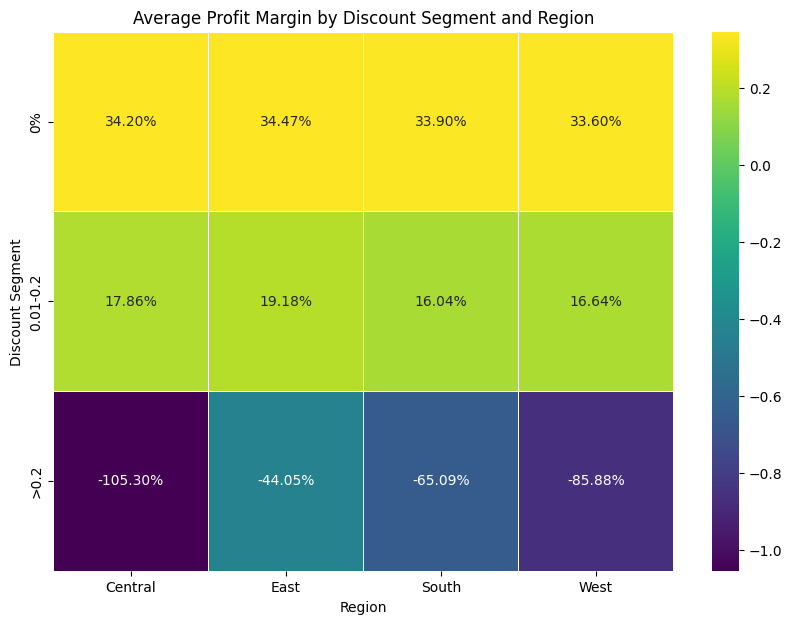


--- Customer Segment and Product Category Interaction ---
       segment         category  Average_Profit_Margin  Average_Profit  \
0     Consumer        Furniture               0.030380        6.281293   
1     Consumer  Office Supplies               0.128761       18.014174   
2     Consumer       Technology               0.152684       74.445646   
3    Corporate        Furniture               0.045795       11.741201   
4    Corporate  Office Supplies               0.137549       22.102923   
5    Corporate       Technology               0.155431       79.723823   
6  Home Office        Furniture               0.052111       10.705465   
7  Home Office  Office Supplies               0.165706       24.034439   
8  Home Office       Technology               0.166888       89.152458   

   Transaction_Count  
0               1113  
1               3127  
2                951  
3                646  
4               1820  
5                554  
6                362  
7               

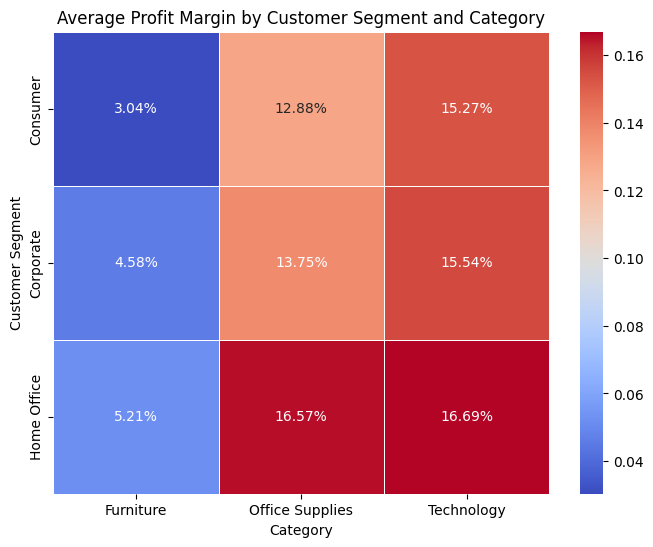

In [ ]:
# 1. Interaction of Discount Segment and Region
discount_region_interaction = df.groupby(['Discount_Segment', 'region']).agg(
    Average_Profit_Margin=('Profit Margin', 'mean'),
    Average_Profit=('profit', 'mean'),
    Number_of_Transactions=('order_id', 'count')
).reset_index()

print("\n--- Discount Segment and Region Interaction ---")
print(discount_region_interaction)

# 2. Visualize Discount × Region Interaction
# Create a pivot table for the heatmap
discount_region_pivot = discount_region_interaction.pivot_table(
    index='Discount_Segment',
    columns='region',
    values='Average_Profit_Margin'
)

plt.figure(figsize=(10, 7))
sns.heatmap(discount_region_pivot, annot=True, fmt=".2%", cmap="viridis", linewidths=.5)
plt.title('Average Profit Margin by Discount Segment and Region')
plt.xlabel('Region')
plt.ylabel('Discount Segment')
plt.show()

# 3. Interaction of Customer Segment and Product Category
segment_category_interaction = df.groupby(['segment', 'category']).agg(
    Average_Profit_Margin=('Profit Margin', 'mean'),
    Average_Profit=('profit', 'mean'),
    Transaction_Count=('order_id', 'count')
).reset_index()

print("\n--- Customer Segment and Product Category Interaction ---")
print(segment_category_interaction)

# 4. Visualize Segment × Category Interaction
# Create a pivot table for the heatmap
segment_category_pivot = segment_category_interaction.pivot_table(
    index='segment',
    columns='category',
    values='Average_Profit_Margin'
)

plt.figure(figsize=(8, 6))
sns.heatmap(segment_category_pivot, annot=True, fmt=".2%", cmap="coolwarm", linewidths=.5)
plt.title('Average Profit Margin by Customer Segment and Category')
plt.xlabel('Category')
plt.ylabel('Customer Segment')
plt.show()

## Validate: Summary

### What Was Done:

- **Checked Relationships**  
  Looked at how discount, sales, profit, quantity, and profit margin are connected.  
  Found that **bigger discounts usually mean lower profit margins** (strong negative link).

- **Built a Prediction Model**  
  Used factors like discount, sales, quantity, category, region, and customer type to predict profit margin.  
  The model showed **discount is the main reason profit margins drop**, and it explained **76% of the changes** in margin.

- **Tested for Differences**  
  - Compared profit margins for orders with 0% discount and those with more than 20%.  
    Found a **clear difference** — high discounts lead to lower profits.  
  - Also tested if different product categories have different profit margins — and they do.


### Why Look at Interactions:

- Business results depend on **combinations** of things, not just one factor.
- For example:
  - **Discount and Region**: Some regions handle discounts better than others.
  - **Customer Type and Category**: Some customer types bring more profit in certain product categories.
- Heatmaps helped **spot the best and worst combinations** easily.


### Why This Is Part of Validate:

- Helps **double-check earlier findings** to make sure they are true.
- Looks at **multiple factors together**, not just one at a time.
- Gives stronger and clearer support for smart business decisions.


## E- Extend


--- Products Classified by Strategy Zone ---
    category subcategory                                       product_name  \
0  Furniture   Bookcases  Atlantic Metals Mobile 2-Shelf Bookcases, Cust...   
1  Furniture   Bookcases  Atlantic Metals Mobile 3-Shelf Bookcases, Cust...   
2  Furniture   Bookcases  Atlantic Metals Mobile 4-Shelf Bookcases, Cust...   
3  Furniture   Bookcases  Atlantic Metals Mobile 5-Shelf Bookcases, Cust...   
4  Furniture   Bookcases                            Bestar Classic Bookcase   

   Total_Sales  Total_Profit  Average_Profit_Margin  Order_Count  \
0     400.0268     -113.2606              -0.705392            2   
1    7539.7122      780.3302               0.044879            8   
2    5184.0810     -126.4410              -0.100899            6   
3    5492.8850       15.0490              -0.128064            8   
4    1897.8102     -612.9387              -0.467132            8   

                       Strategy_Zone  
0  Optimize (High Sales, Low Pr

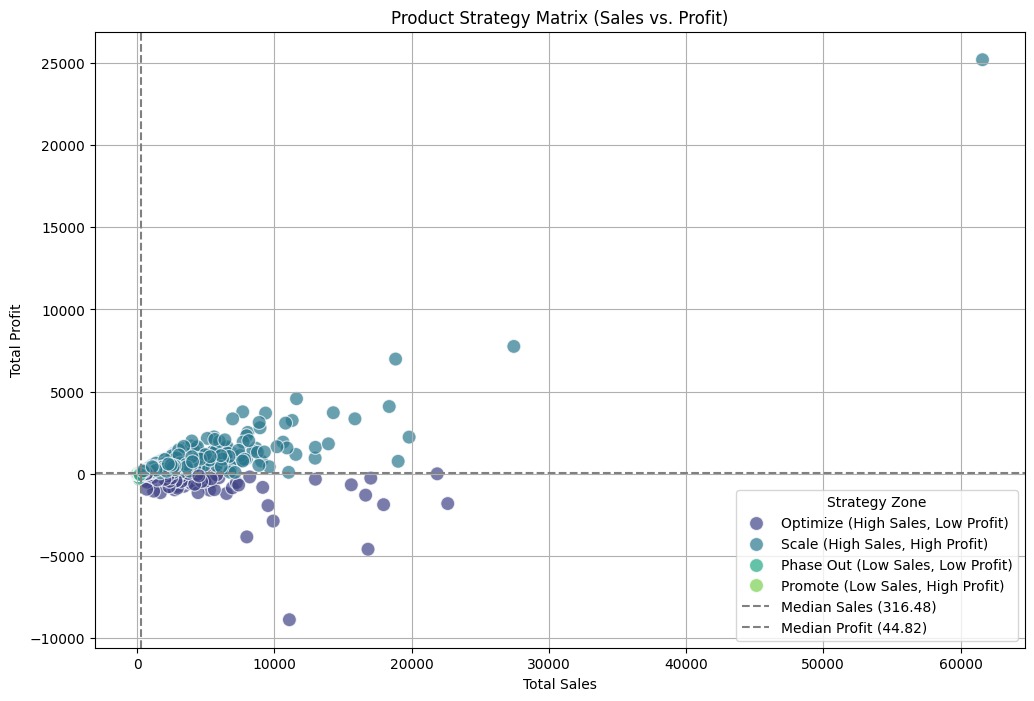


--- Category Performance Summary (from Investigate) ---
          category  Total_Sales  Total_Profit  Average_Profit_Margin  \
0        Furniture  741999.7953    18451.2728               0.038784   
1  Office Supplies  719047.0320   122490.8008               0.138030   
2       Technology  836154.0330   145454.9481               0.156138   

   Order_Count  
0         2121  
1         6026  
2         1847  

--- Subcategory Performance Summary (from Investigate) ---
    subcategory   Mean_Sales  Mean_Profit  Mean_Profit_Margin
6       Copiers  2198.941618   817.909190            0.317194
0   Accessories   215.974604    54.111788            0.218210
13       Phones   371.211534    50.073938            0.119222
5        Chairs   532.332420    43.095894            0.043900
1    Appliances   230.755710    38.922758           -0.156869
   subcategory  Mean_Sales  Mean_Profit  Mean_Profit_Margin
16      Tables  648.794771   -55.565771           -0.147727
4    Bookcases  503.859633   -15.2

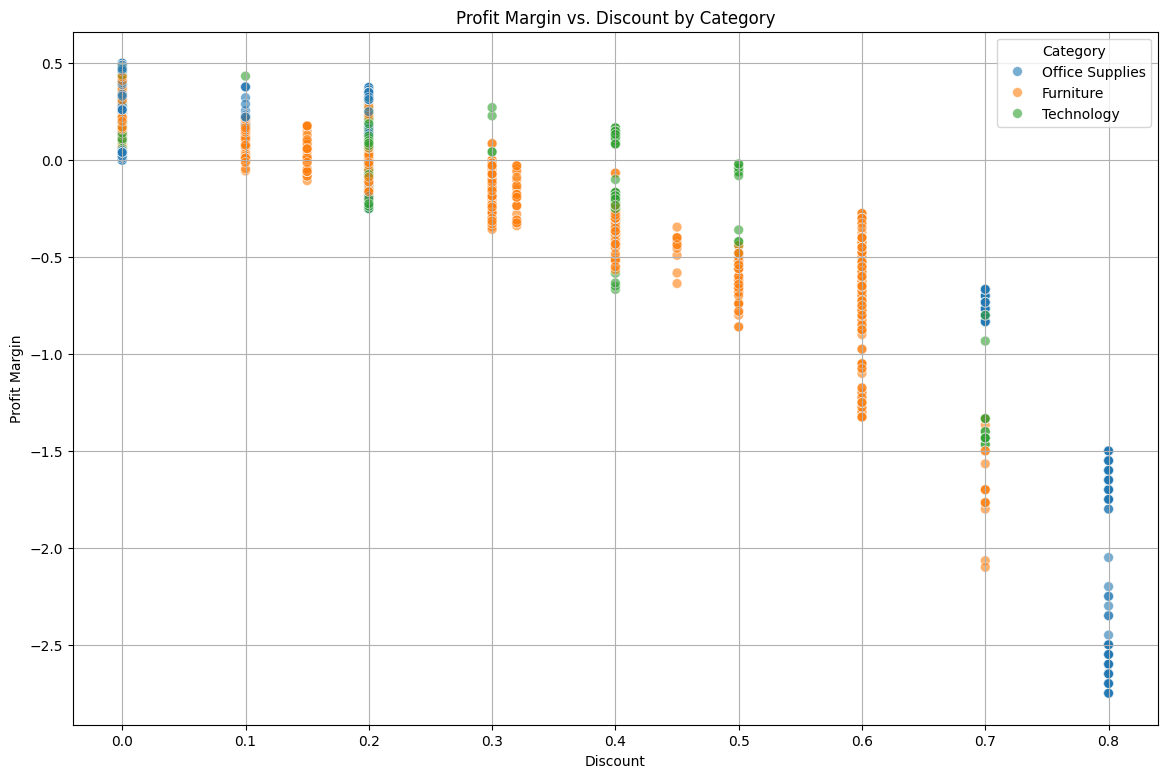

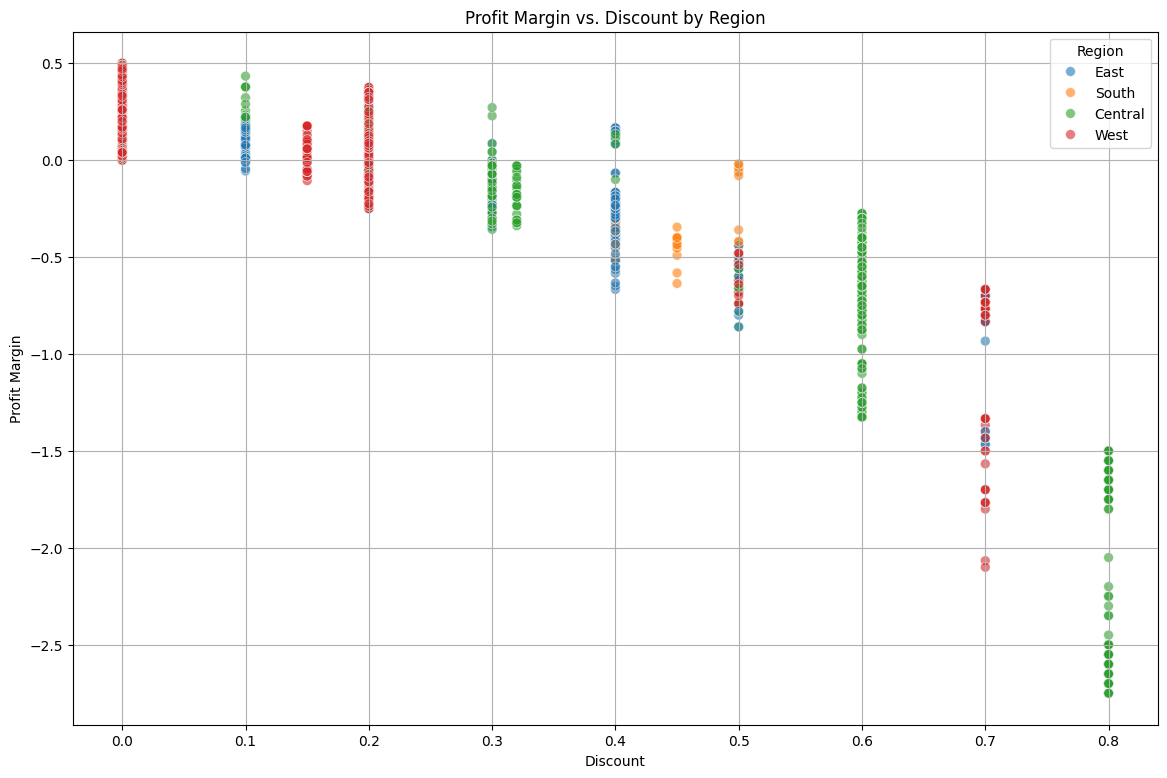


--- Analysis of >20% Discount Segment by Region ---
    region  Average_Profit_Margin  Total_Profit  Number_of_Transactions
0  Central              -1.053011   -52392.2744                     643
3     West              -0.858757   -16014.6922                     118
2    South              -0.650916   -24880.4818                     171
1     East              -0.440494   -42088.6076                     461

--- Analysis of 0.01-0.2 Discount Segment by Category ---
          category  Average_Profit_Margin  Total_Profit  \
1  Office Supplies               0.231716    39124.8320   
2       Technology               0.111039    46864.6900   
0        Furniture               0.075103    14795.9525   

   Number_of_Transactions  
1                    2217  
2                     843  
0                     743  

--- Region Performance Summary (from Investigate) ---
    region  Mean_Sales  Mean_Profit  Mean_Profit_Margin
3     West  226.493233    33.849032            0.219487
1     East  

/tmp/ipython-input-41-1480071908.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_analysis, x='region', y='Mean_Profit_Margin', palette='viridis')


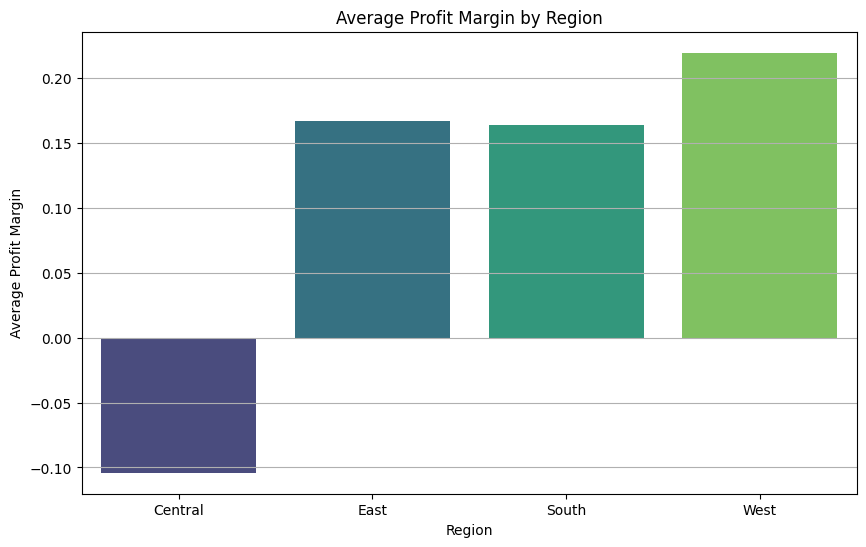

/tmp/ipython-input-41-1480071908.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_segment_analysis, x='segment', y='Mean_Profit_Margin', palette='viridis')


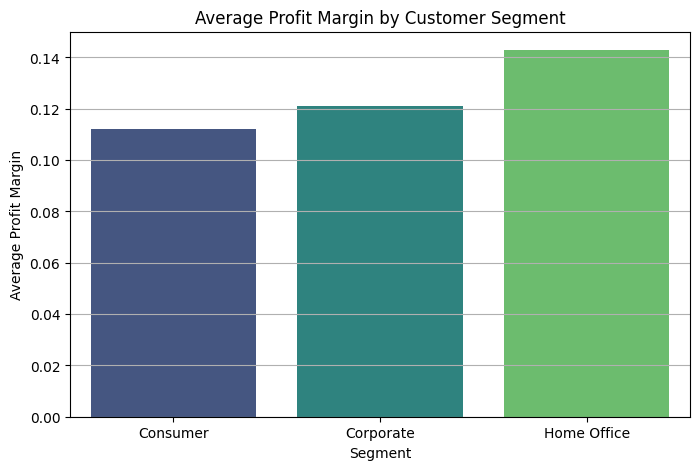

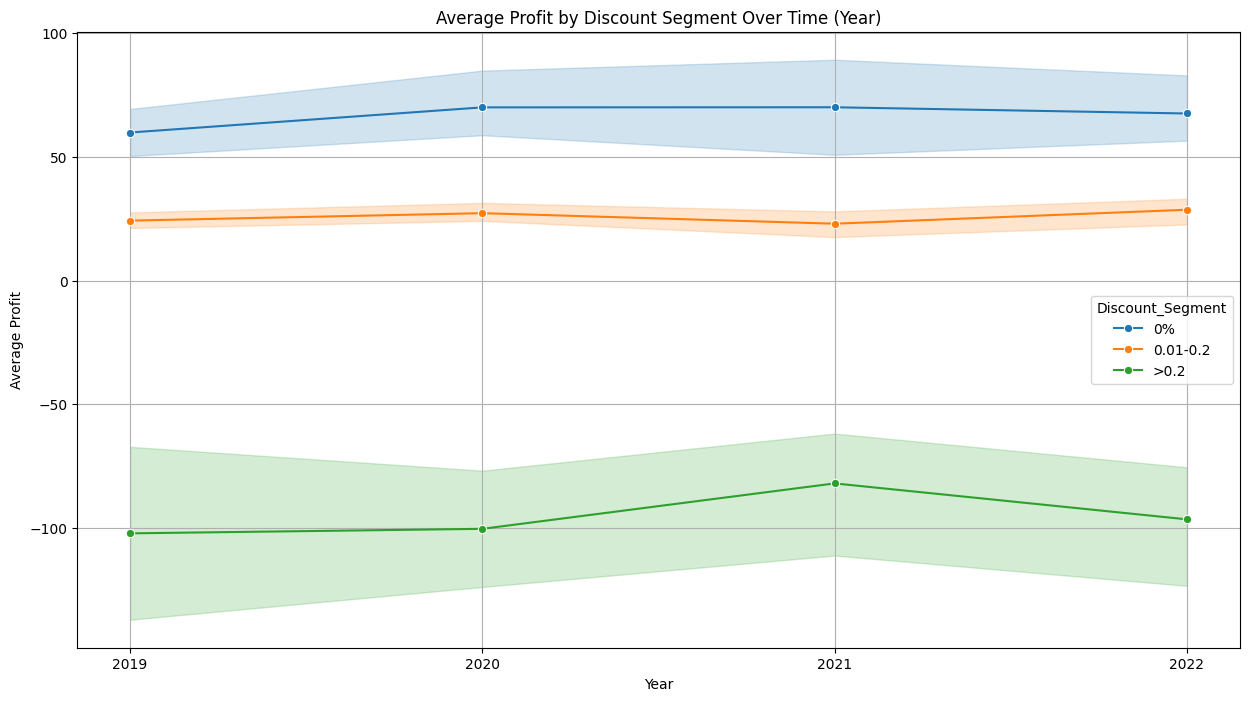

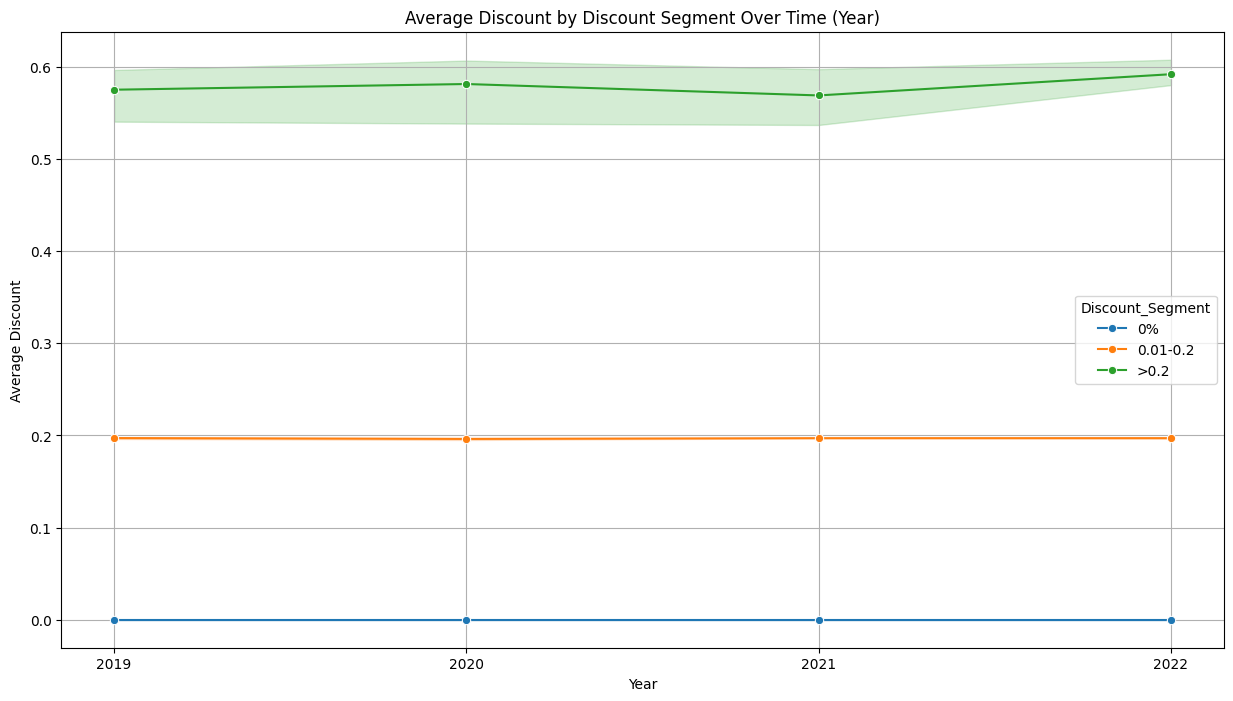

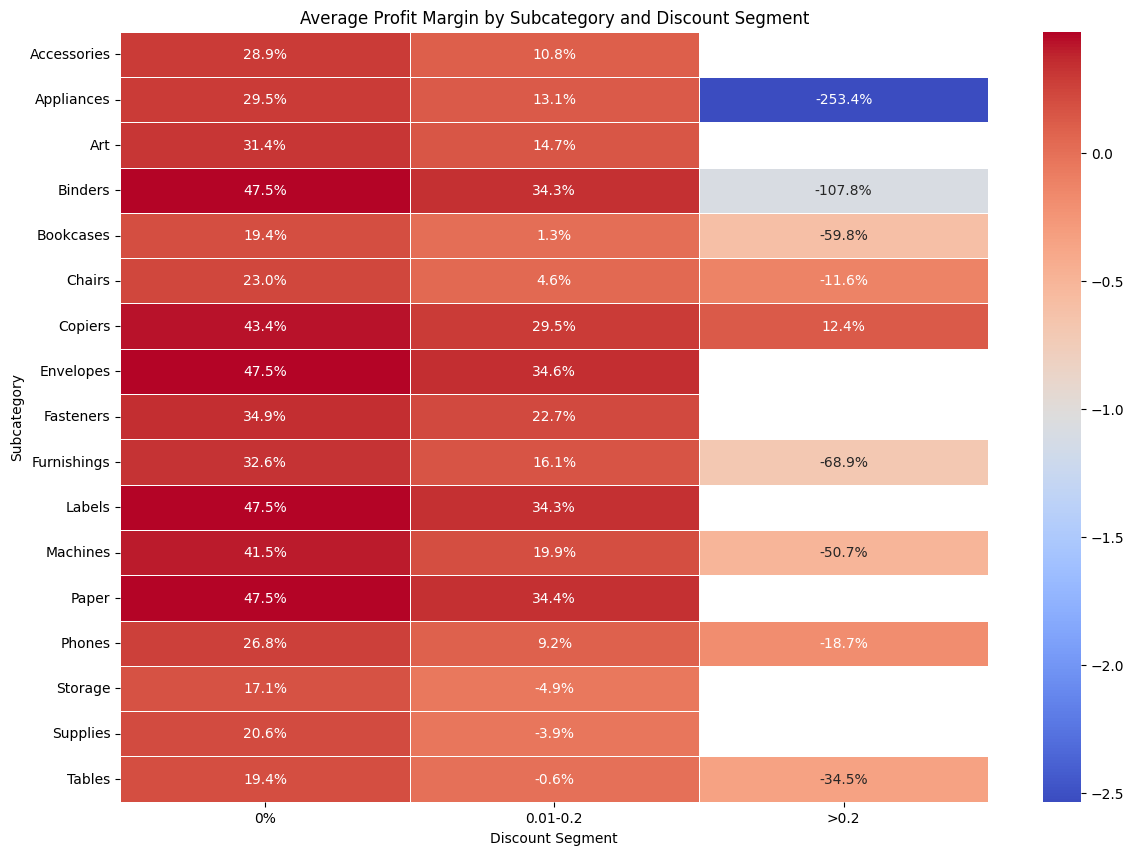

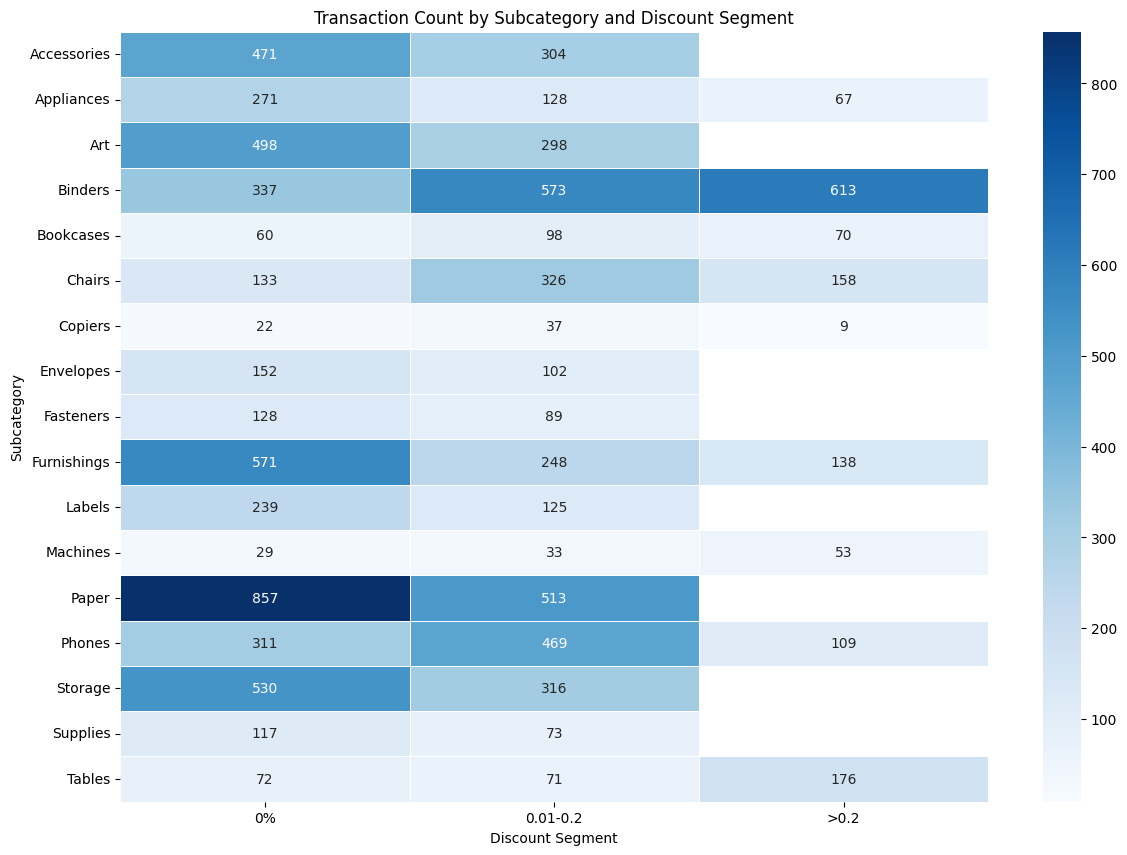

In [ ]:
sales_percentile = kpi_aggregation['Total_Sales'].quantile(0.5) # Using median as threshold
profit_percentile = kpi_aggregation['Total_Profit'].quantile(0.5) # Using median as threshold

# Function to classify products
def classify_product_strategy(row):
    if row['Total_Sales'] > sales_percentile and row['Total_Profit'] > profit_percentile:
        return 'Scale (High Sales, High Profit)'
    elif row['Total_Sales'] > sales_percentile and row['Total_Profit'] <= profit_percentile:
        return 'Optimize (High Sales, Low Profit)'
    elif row['Total_Sales'] <= sales_percentile and row['Total_Profit'] > profit_percentile:
        return 'Promote (Low Sales, High Profit)'
    else:
        return 'Phase Out (Low Sales, Low Profit)'

kpi_aggregation['Strategy_Zone'] = kpi_aggregation.apply(classify_product_strategy, axis=1)

print("\n--- Products Classified by Strategy Zone ---")
print(kpi_aggregation.head())

# Visualize Product Strategy Matrix using a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=kpi_aggregation, x='Total_Sales', y='Total_Profit', hue='Strategy_Zone', palette='viridis', s=100, alpha=0.7)
plt.axvline(x=sales_percentile, color='grey', linestyle='--', label=f'Median Sales ({sales_percentile:.2f})')
plt.axhline(y=profit_percentile, color='grey', linestyle='--', label=f'Median Profit ({profit_percentile:.2f})')
plt.title('Product Strategy Matrix (Sales vs. Profit)')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.legend(title='Strategy Zone')
plt.grid(True)
plt.show()


# 2. Category & Subcategory Focus - Reiterate findings

print("\n--- Category Performance Summary (from Investigate) ---")
print(category_aggregation)

print("\n--- Subcategory Performance Summary (from Investigate) ---")
print(subcategory_analysis.sort_values(by='Mean_Profit', ascending=False).head()) # Top profitable
print(subcategory_analysis.sort_values(by='Mean_Profit', ascending=True).head()) # Bottom (loss-making)


# 3. Discount Strategy Playbook - Visualize impact

# Scatter plot of Profit Margin vs. Discount colored by Category
plt.figure(figsize=(14, 9))
sns.scatterplot(data=df, x='discount', y='Profit Margin', hue='category', alpha=0.6, s=50)
plt.title('Profit Margin vs. Discount by Category')
plt.xlabel('Discount')
plt.ylabel('Profit Margin')
plt.legend(title='Category')
plt.grid(True)
plt.show()

# Scatter plot of Profit Margin vs. Discount colored by Region
plt.figure(figsize=(14, 9))
sns.scatterplot(data=df, x='discount', y='Profit Margin', hue='region', alpha=0.6, s=50)
plt.title('Profit Margin vs. Discount by Region')
plt.xlabel('Discount')
plt.ylabel('Profit Margin')
plt.legend(title='Region')
plt.grid(True)
plt.show()

# Analyze average profit margin for high discounts (>20%) by region
high_discount_analysis_region = df[df['Discount_Segment'] == '>0.2'].groupby('region').agg(
    Average_Profit_Margin=('Profit Margin', 'mean'),
    Total_Profit=('profit', 'sum'), # Also look at total profit
    Number_of_Transactions=('order_id', 'count')
).reset_index().sort_values(by='Average_Profit_Margin')

print("\n--- Analysis of >20% Discount Segment by Region ---")
print(high_discount_analysis_region)

# Analyze average profit margin for modest discounts (0.01-0.2) by category
modest_discount_analysis_category = df[df['Discount_Segment'] == '0.01-0.2'].groupby('category').agg(
    Average_Profit_Margin=('Profit Margin', 'mean'),
    Total_Profit=('profit', 'sum'),
    Number_of_Transactions=('order_id', 'count')
).reset_index().sort_values(by='Average_Profit_Margin', ascending=False)

print("\n--- Analysis of 0.01-0.2 Discount Segment by Category ---")
print(modest_discount_analysis_category)


# 4. Regional & Segment-Specific Strategy - Reiterate and visualize

print("\n--- Region Performance Summary (from Investigate) ---")
print(region_analysis.sort_values(by='Mean_Profit_Margin', ascending=False))

print("\n--- Customer Segment Performance Summary (from Investigate) ---")
print(customer_segment_analysis.sort_values(by='Mean_Profit_Margin', ascending=False))

# Visualize Profit Margin by Region and Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=region_analysis, x='region', y='Mean_Profit_Margin', palette='viridis')
plt.title('Average Profit Margin by Region')
plt.xlabel('Region')
plt.ylabel('Average Profit Margin')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=customer_segment_analysis, x='segment', y='Mean_Profit_Margin', palette='viridis')
plt.title('Average Profit Margin by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Average Profit Margin')
plt.grid(axis='y')
plt.show()


# Plotting Mean Profit by Discount Segment over Time
plt.figure(figsize=(15, 8))
sns.lineplot(data=discount_seasonality, x='Order Year', y='Mean_Profit', hue='Discount_Segment', marker='o')
plt.title('Average Profit by Discount Segment Over Time (Year)')
plt.xlabel('Year')
plt.ylabel('Average Profit')
plt.xticks(discount_seasonality['Order Year'].unique()) # Set x-ticks to only show years
plt.grid(True)
plt.show()

# Plotting Mean Discount over Time
plt.figure(figsize=(15, 8))
sns.lineplot(data=discount_seasonality, x='Order Year', y='Mean_Discount', hue='Discount_Segment', marker='o')
plt.title('Average Discount by Discount Segment Over Time (Year)')
plt.xlabel('Year')
plt.ylabel('Average Discount')
plt.xticks(discount_seasonality['Order Year'].unique()) # Set x-ticks to only show years
plt.grid(True)
plt.show()


# 6. Visualization Ideas - Already implemented scatter plots and heatmaps above

# Heatmap of Product Strategy Matrix (Alternative visualization)
# Count products in each zone for this heatmap
strategy_zone_counts = kpi_aggregation.groupby(['Strategy_Zone']).size().reset_index(name='Product_Count')

# Could create a more complex heatmap based on aggregated category/subcategory performance within zones
# Or just use the scatter plot as already done, which is more informative per product.

# Example: Heatmap of Avg Profit Margin by Subcategory and Discount Segment
subcategory_discount_interaction = df.groupby(['subcategory', 'Discount_Segment']).agg(
    Average_Profit_Margin=('Profit Margin', 'mean'),
    Transaction_Count=('order_id', 'count')
).reset_index()

# Pivot for heatmap
subcategory_discount_pivot = subcategory_discount_interaction.pivot_table(
    index='subcategory',
    columns='Discount_Segment',
    values='Average_Profit_Margin'
)

plt.figure(figsize=(14, 10))
sns.heatmap(subcategory_discount_pivot, annot=True, fmt=".1%", cmap="coolwarm", linewidths=.5)
plt.title('Average Profit Margin by Subcategory and Discount Segment')
plt.xlabel('Discount Segment')
plt.ylabel('Subcategory')
plt.show()

# Heatmap of Transaction Count by Subcategory and Discount Segment
subcategory_discount_transactions_pivot = subcategory_discount_interaction.pivot_table(
    index='subcategory',
    columns='Discount_Segment',
    values='Transaction_Count'
)

plt.figure(figsize=(14, 10))
sns.heatmap(subcategory_discount_transactions_pivot, annot=True, fmt=".0f", cmap="Blues", linewidths=.5)
plt.title('Transaction Count by Subcategory and Discount Segment')
plt.xlabel('Discount Segment')
plt.ylabel('Subcategory')
plt.show()

## Extend - Summary

### 1. High-Performing Products
- *Canon Copiers* belong to the **Scale** zone (High Sales, High Profit).
- These products should be prioritized for investment and promotion.

### 2. Unprofitable but Popular Products
- Products like *Tables*, *Binders*, and *Bookcases* fall under **Optimize** (High Sales, Low Profit).
- Recommend reviewing pricing/discount strategy or phasing out.

### 3. Category-Level Insights
- **Technology** and **Office Supplies** deliver strong margins (15.6% and 13.8% respectively).
- **Furniture** category has low profitability (only ~3.9%) despite high sales volume.

### 4. Discount Strategy Insights
- Deep discounts **greater than 20%** lead to **negative margins** in all regions (e.g., -105% in Central).
- Moderate discounts **(0.01–0.2)** perform better, especially in:
  - **Office Supplies**: 23.2% margin
  - **Technology**: 11.1% margin

### 5. Regional Performance
- **West** (21.9%) and **East** (16.7%) are the most profitable regions.
- **Central** region has **negative average margins**, indicating a need for strategic review.

### 6. Customer Segment Strategy
- **Home Office** (14.3%) and **Corporate** (12.1%) segments are more profitable than **Consumer** (11.2%).
- Suggest focusing B2B marketing efforts on Corporate and Home Office customers.

### 7. Seasonality Planning
- Q4 sees a spike in both **sales and discounting**.
- Recommend **controlled Q4 discounting** and **early Q3 promotions** to balance volume and profitability.



---

### **ANALYSIS** **AND** **CONCLUSION**

**1. Which products/categories perform best?**

*   **Best Performing Product (Overall):**
    *   Canon imageCLASS 2200 Advanced Copier is the top performer by both Total Sales (\$61,599) and Total Profit (\$25,200). It also boasts a healthy Average Profit Margin (~38%). This product is classified in the Scale zone (High Sales, High Profit).
*   **Best Performing Products (High Profit Margin, but potentially lower sales):**
    *   Products in theOffice Supplies category like *Avery* and *Adams* consistently reached50% profit margins. While highly profitable *per unit*, theirlow sales volumes** indicate they are niche products.
*  **Best Performing Category:**
    *  **Technology** is the leading category across all key performance indicators:
        *   Total Sales: \$836K
        *   Total Profit: \$145K
        *   Average Profit Margin: 15.6%
*   **Second Best Performing Category:**
    *   Office Supplies follows Technology, demonstrating strong, albeit slightly lower, overall performance.
*   **Highest Profit Margin Subcategories**:
    *   *Labels (43%)*, *Paper (42.5%)*, *Envelopes (42.3%)*, and *Copiers (31.7%)* show the highest average profit margins.

**2. What drives product profitability?**

*   **Discount:** The analysis strongly indicates that discount is the primary driver of profitability.
    *   Higher discounts lead to significantly lower profit margins. The correlation matrix shows a strong negative correlation (-0.86) between `discount` and `Profit Margin`.
    *   The regression analysis confirms that `discount` is the most significant predictor of `Profit Margin`, with a negative coefficient.
    *   The hypothesis test comparing profit margins between 0% discount and >20% discount groups found a statistically significant difference, with deep discounts resulting in significantly lower (and often negative) margins.
    *   Orders with 0% Discount have the highest average profit margin (34%).
    *   Discounts greater than 20% result in negative profit margins (-78%).
*   **Category and Subcategory:** The product category and subcategory significantly influence profitability.
    *   Technology and Office Supplies have higher average profit margins compared to Furniture.
    *   Certain subcategories (like Labels, Paper, Envelopes, Copiers) are inherently more profitable than others (like Tables, Machines, Binders, Bookcases).
    *   The ANOVA test confirms a statistically significant difference in average profit margins among categories.
*   **Customer Segment:** The customer segment also impacts profitability.
    *   Home Office (14.3%) and Corporate (12.1%) segments are more profitable on average than the Consumer (11.2%) segment, despite the Consumer segment having the most transactions.
*   **Region**: Regional performance varies significantly in terms of profitability.
    *   The West region has the highest average profit margin (21.9%), while the Central region shows negative average profit margins.
*   **State:** At a more granular level, profitability varies by state, with some states consistently showing negative average profit (e.g., Illinois, Texas, Ohio, Pennsylvania).
*   **Seasonality and Discount Patterns:** Discounting patterns, particularly the spike in deep discounting during Q4, negatively impact overall profitability during those periods.

**3. Where should we focus product strategy?**

Based on the findings, the product strategy should focus on the following areas:

*   **Prioritize "Scale" Products:** Invest in and promote products classified in the **Scale** zone (High Sales, High Profit), such as *Canon Copiers*. These are the most valuable products and drive significant revenue and profit.
*   **Optimize "Optimize" Products:** For products in the **Optimize** zone (High Sales, Low Profit) like *Tables, Binders, and Bookcases*, strategically review pricing, discounting, and cost structures. Consider reducing deep discounts, exploring alternative sourcing, or potentially phasing out if profitability cannot be improved.
*   **Promote "Promote" Products:** Products in the **Promote** zone (Low Sales, High Profit) like *Labels, Paper, and Envelopes* should be actively promoted to increase sales volume while maintaining their high profit margins. These represent missed opportunities if not effectively marketed.
*   **Evaluate "Phase Out" Products:** Products in the **Phase Out** zone (Low Sales, Low Profit) may require discontinuation or significant restructuring.
*   **Focus on Profitable Categories and Subcategories:**
    *   Continue to invest in and grow the **Technology** and **Office Supplies** categories, leveraging their inherent profitability.
    *   Specifically target high-margin subcategories like *Labels, Paper, Envelopes, and Copiers* across categories.
    *   Carefully evaluate the **Furniture** category's strategy due to its low profitability despite high sales. Explore ways to improve margins within this category.
*   **Refine Discounting Strategy:**
    *   **Significantly reduce or eliminate deep discounts (greater than 20%)**, as they consistently lead to losses across all regions.
    *   Use **moderate discounts** strategically, especially in profitable categories like **Office Supplies** and **Technology**, where they still allow for positive margins.
    *   Implement tighter controls on discounting, particularly in regions or on products that have historically shown negative profitability with discounts.
*   **Target Profitable Segments and Regions:**
    *   Increase focus on the **Home Office** and **Corporate** customer segments through targeted marketing and sales efforts, as they are more profitable than the Consumer segment.
    *   Develop strategies to improve profitability in underperforming regions, particularly the **Central region**. This might involve adjusting pricing, discount levels, or sales strategies in that specific region.
    *   Address the profitability issues in states with negative average profit margins by investigating the root causes (e.g., excessive discounting, high operational costs) and implementing corrective actions.
*   **Strategically Plan for Seasonality:**
    *   While Q4 is a high-volume period, the tendency for increased deep discounting during this time negatively impacts profitability.
    *   Consider **controlled Q4 discounting** and potentially **shifting promotions to earlier quarters (e.g., Q3)** to balance sales volume with profitability throughout the year.
